# Port Congestion API Example Queries.

## Find that example in [Colab](https://colab.research.google.com/drive/1E-PoWlPMz0OiJpZfdP1-T5Uf3mjYfzZi?authuser=1#scrollTo=xHmeLgGYDINd)

- Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [16]:
signal_ocean_api_key = ""  # replace with your subscription key

## Setup

- Install the Signal Ocean SDK and import all required modules:

In [17]:
%%capture
!pip install signal-ocean

In [18]:
from signal_ocean import Connection
from signal_ocean.port_congestion.port_congestion_api import PortCongestionAPI

import pandas as pd
pd.set_option('display.max_columns', None)

from datetime import date
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
# Uncomment to save graphs as PNGs
# import plotly.io as pio
# pio.renderers.default = "png"

# Create instance of PortCongestionAPI used throughout this notebook:
connection = Connection(signal_ocean_api_key)
# connection = Connection(signal_ocean_api_key, api_host="https://signaloceantestapims.azure-api.net")
port_congestion_api = PortCongestionAPI(connection)

- Define Plot Port Congestion Helper Function

In [19]:
def congestion_plot(timeseries, title=""):
  fig = sp.make_subplots(
    rows=3, 
    cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.07,
    x_title="Observation Date",
    subplot_titles=("Vessels at Port", "Arrivals & Departures", "Estimated Average Wait")
  )

  # Queue
  fig.add_trace(
    go.Scatter(
      x=timeseries.index, 
      y=timeseries["queue"], 
      name="Vessels at Port", 
      line={"color": "orange", "width": 2}
    ), row=1, col=1
  )

  fig.update_yaxes(title_text="Vessels", row=1, col=1)
  
  # Arrivals/Departures
  fig.add_trace(
    go.Scatter(
      x=timeseries.index,
      y=timeseries["arrivals"],
      name="Arrivals",
      line={"color": "green", "width": 2}
    ),
    row=2, col=1
  )
  
  fig.append_trace(
    go.Scatter(
      x=timeseries.index,
      y=timeseries["departures"],
      name="Departures",
      line={"color": "blue", "width": 2}
    ), row=2, col=1
  )

  fig.update_yaxes(title_text="Vessels", row=2, col=1)

  # Wait Estimate
  fig.add_trace(
    go.Scatter(
      x=timeseries.index,
      y=timeseries["avg_wait_estimate"],
      name="Estimated Wait",
      line={"color": "red", "width": 2}
    ), row=3, col=1
  )

  fig.update_yaxes(title_text="Days", row=3, col=1)

  # Show Plot
  fig.update_layout(width=1000, height=500, title_text=title)
  fig.show()

## Query: Capes in "China/Taiwan" from Jan 1st, 2021 to Today

In [20]:
dt = date.fromisoformat("2021-01-01")
response = port_congestion_api.query_port_congestion(level_1_areas=["China / Taiwan"], vessel_classes=["Capesize"], date_from=dt)

ts_df = pd.DataFrame(response)
ts_df ["observation_date"] = ts_df["observation_date"].dt.date
ts_df.set_index("observation_date", inplace=True)

display(ts_df)

,queue,queue_loading,queue_discharging,arrivals,departures,avg_days_since_arrival,avg_wait_estimate,avg_eventual_days_by_departure
observation_date,,,,,,,,
2021-01-01,183,180,3,13,24,7.2,11.3,83.666667
2021-01-02,177,175,2,14,20,7.3,11.8,152.500000
2021-01-03,182,180,2,25,20,6.7,11.5,157.333333
2021-01-04,181,179,2,24,25,6.7,11.4,130.333333
2021-01-05,175,174,1,22,28,6.5,11.6,161.500000
...,...,...,...,...,...,...,...,...
2023-07-08,113,112,1,18,21,2.7,6.2,69.000000
2023-07-09,119,118,1,26,20,2.7,6.1,62.166667
2023-07-10,127,126,1,28,20,2.7,6.3,85.000000


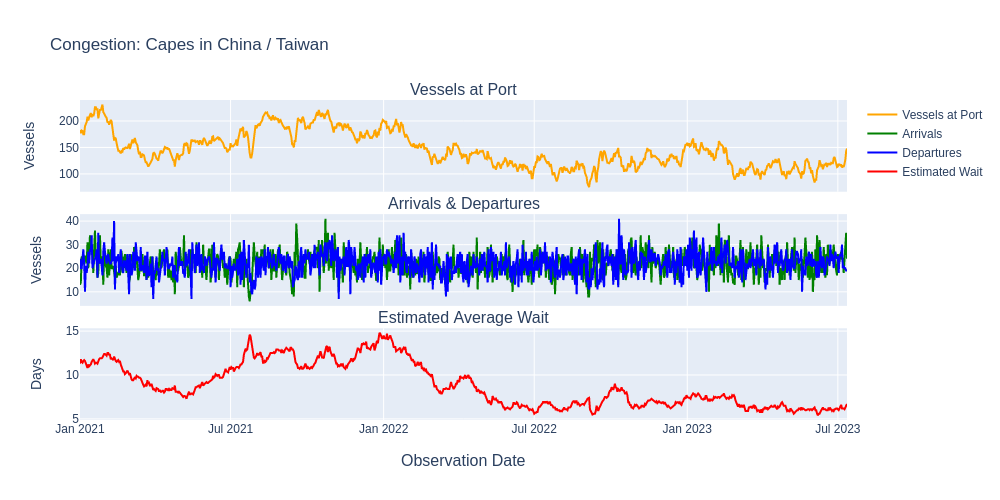

In [21]:
congestion_plot(ts_df, title="Congestion: Capes in China / Taiwan")

## Query: Aframax in "Rotterdam" from Jan 1st, 2023t to Today

In [22]:
dt = date.fromisoformat("2021-01-01")
response = port_congestion_api.query_port_congestion(ports=["Rotterdam"], vessel_classes=["Aframax"], date_from=dt)

afrt_df = pd.DataFrame(response)
afrt_df["observation_date"] = afrt_df["observation_date"].dt.date
afrt_df.set_index("observation_date", inplace=True)

display(afrt_df)

,queue,queue_loading,queue_discharging,arrivals,departures,avg_days_since_arrival,avg_wait_estimate,avg_eventual_days_by_departure
observation_date,,,,,,,,
2021-01-01,10,7,3,4,1,2.4,3.9,2.000000
2021-01-02,11,9,2,3,2,1.3,4.1,9.000000
2021-01-03,13,12,1,3,1,1.6,4.2,4.000000
2021-01-04,12,11,1,2,3,1.9,4.2,3.333333
2021-01-05,14,13,1,5,3,1.8,4.3,3.000000
...,...,...,...,...,...,...,...,...
2023-07-08,0,0,0,0,1,0.0,2.9,2.000000
2023-07-09,4,4,0,4,0,0.0,2.9,0.000000
2023-07-10,5,5,0,1,0,0.8,3.0,0.000000


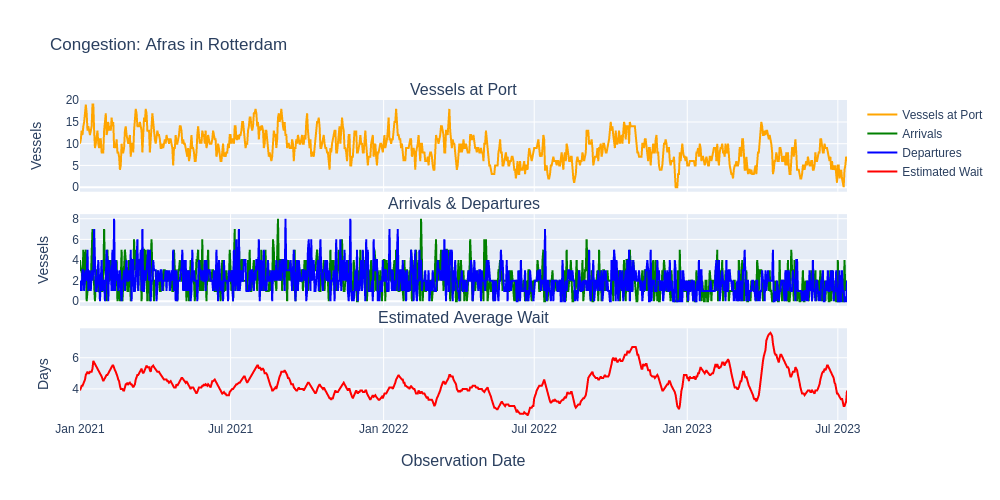

In [23]:
congestion_plot(afrt_df, title="Congestion: Afras in Rotterdam")